In [35]:
import pandas as pd

In [36]:
df = pd.read_csv('rvk_sites.csv')

In [60]:
our_df = pd.read_csv('Created CSVs/Cleaned_For_Analysis_All_Data.csv')

In [43]:
df.columns

Index([u'site_id', u'url', u'st', u'contact', u'agencies', u'latitude',
       u'longitude', u'count', u'geomean', u'maximum', u'minimum', u'id',
       u'location_id', u'site_name', u'sample_date', u'specimen_count',
       u'specimen_count_int', u'temperature', u'salinity', u'chlorophyll',
       u'turbidity', u'oxygen', u'rain_day_of', u'rain_prior_day',
       u'rain_2_days_prior', u'rain_3_days_prior', u'rain_3_day_total',
       u'rain_4_days_prior', u'rain_5_days_prior', u'rain_5_day_total',
       u'site_type'],
      dtype='object')

In [38]:
df_names = df[['site_name', 'latitude', 'longitude']].drop_duplicates()

In [39]:
#df_names

In [40]:
near_by_sites = df[(((df['latitude'] >40.67) & (df['latitude'] <40.77)) & ((df['longitude'] <-73.93) & (df['longitude'] > -74.3)))]

In [51]:
keeping = near_by_sites.columns.values[13:]

In [52]:
keeping

array(['site_name', 'sample_date', 'specimen_count', 'specimen_count_int',
       'temperature', 'salinity', 'chlorophyll', 'turbidity', 'oxygen',
       'rain_day_of', 'rain_prior_day', 'rain_2_days_prior',
       'rain_3_days_prior', 'rain_3_day_total', 'rain_4_days_prior',
       'rain_5_days_prior', 'rain_5_day_total', 'site_type'], dtype=object)

In [54]:
near_by_sites[keeping].to_csv('Created CSVs/RiverKeeperNearbyWaterData.csv')

In [56]:
set(near_by_sites['site_name'])

{'Castle Point, NJ',
 'East River mid-channel at 23rd St.',
 'East River mid-channel at Roosevelt Is.',
 'Gowanus Canal',
 'Newtown Creek- Dutch Kills',
 'Newtown Creek- Metropolitan Ave. Bridge',
 'The Battery mid-channel'}

In [67]:
import dateutil

In [69]:
dates  = [dateutil.parser.parse(x) for x in list(set(near_by_sites['sample_date']))]

In [70]:
our_dates  = [dateutil.parser.parse(x) for x in list(set(our_df['Date']))]

In [73]:
set(near_by_sites['site_name'])

{'Castle Point, NJ',
 'East River mid-channel at 23rd St.',
 'East River mid-channel at Roosevelt Is.',
 'Gowanus Canal',
 'Newtown Creek- Dutch Kills',
 'Newtown Creek- Metropolitan Ave. Bridge',
 'The Battery mid-channel'}

In [71]:
for date in our_dates:
    if date in dates:
        print date

2015-06-11 00:00:00
2016-06-15 00:00:00
2016-07-13 00:00:00
2016-06-14 00:00:00
2012-10-10 00:00:00
2010-07-21 00:00:00


In [78]:
near_by_sites['sample_date'] = [dateutil.parser.parse(x) for x in near_by_sites['sample_date']]

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [104]:
gr_1 = near_by_sites[near_by_sites['site_name'] == 'East River mid-channel at 23rd St.'][['sample_date','turbidity']]

In [105]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [106]:
gr_1 = gr_1[gr_1['turbidity'] > 0]

In [107]:
gr_1 = gr_1.set_index('sample_date')

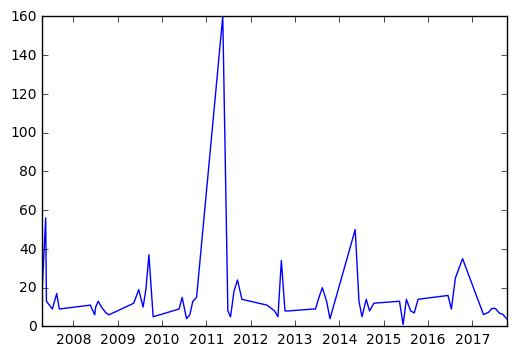

In [108]:
plt.plot(gr_1) 